<a href="https://colab.research.google.com/github/derrickgreenspan/COT5600/blob/master/Quantum_computing_hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW 3

### Problem 1 

Let $\omega=\mathrm{exp}(2\pi i/N)$ be the $N$th root of unity.  The Fourier matrix of size $N$ is the matrix $F_N=(q_{k,\ell})\in\mathbb{C}^{N\times N}$ whose entries are given by
$$q_{k,\ell}=\frac{1}{\sqrt{N}} \omega^{k \cdot \ell}$$ for $k, \ell \in \{0,\ldots,N-1\}$.

Using numpy, implement the function ```get_fourier_matrix``` that create the Fourier matrix of size $N$.

Compute the eigenvalues of eigenvectors of the Fourier matrix.  

To check that your code is correct, you should verify that the Fourier matrix is unitary and that its eigenvalues are $N$th roots of unity.

In [0]:
import numpy as np
def get_fourier_matrix(N):
  omega = np.exp((2*np.pi*1j)/N)
  normalizer = 1/np.sqrt(N)
  return np.asarray([[normalizer*omega**(j*i) for i in range(N)] for j in range(N)])

def check_if_unitary(f): # From https://stackoverflow.com/questions/34997244/is-there-a-way-in-numpy-to-test-whether-a-matrix-is-unitary (link given to me by Justin Gosselin)
  return np.allclose(np.eye(len(f)), f.dot(f.T.conj()))  


# Test output
size = 2
fourier_matrix_size_2 = get_fourier_matrix(size)
print(fourier_matrix_size_2)
if(check_if_unitary(fourier_matrix_size_2)):
  print("The matrix of size", size, "is unitary")
else:
  printf("The matrix of size", size, "is not unitary")

if(np.allclose(np.eye(len(fourier_matrix_size_2)),
               la.matrix_power(fourier_matrix_size_2, 4))):
  print("The fourth power of the fourier matrix is the identity matrix")
else:
    print("The fourth power of the fourier matrix is not the identity matrix")

if(np.allclose((la.eig(fourier_matrix_size_2)[0]**4), 1)):
  print("The eigenvalues of the fourier matrix of size", size, "are the",
          "4th roots of unity")
else:
  print("The eigenvalues of the fourier matrix of size", size, "are not",
        "the 4th roots of unity")




# Let's try another one
size = 3
fourier_matrix_size_3 = get_fourier_matrix(size)
print("\n", fourier_matrix_size_3)
if(check_if_unitary(fourier_matrix_size_3)):
  print("The matrix of size", size, "is unitary")
else:
  printf("The matrix of size", size, "is not unitary")

if(np.allclose(np.eye(len(fourier_matrix_size_3)),
               la.matrix_power(fourier_matrix_size_3, 4))):
  print("The fourth power of the fourier matrix is the identity matrix")
else:
    print("The fourth power of the fourier matrix is not the identity matrix")

if(np.allclose((la.eig(fourier_matrix_size_3)[0]**4), 1)):
  print("The eigenvalues of the fourier matrix of size", size, "are the",
          "4th roots of unity")
else:
  print("The eigenvalues of the fourier matrix of size", size, "are not",
        "the 4th roots of unity")




[[ 0.70710678+0.00000000e+00j  0.70710678+0.00000000e+00j]
 [ 0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]]
The matrix of size 2 is unitary
The fourth power of the fourier matrix is the identity matrix
The eigenvalues of the fourier matrix of size 2 are the 4th roots of unity

 [[ 0.57735027+0.j   0.57735027+0.j   0.57735027+0.j ]
 [ 0.57735027+0.j  -0.28867513+0.5j -0.28867513-0.5j]
 [ 0.57735027+0.j  -0.28867513-0.5j -0.28867513+0.5j]]
The matrix of size 3 is unitary
The fourth power of the fourier matrix is the identity matrix
The eigenvalues of the fourier matrix of size 3 are the 4th roots of unity


**Cyclic shift matrix**

The cyclic shift matrix is the matrix $P_N=(p_{k,\ell}\in\mathbb{C}^{N\times N})$
 whose entries are given by

$$ p_{k,\ell} = 1 \mbox{ if } \ell = k + 1 \pmod{N} $$

$$ p_{k,\ell} = 0 \mbox{ if } \ell \neq k + 1 \pmod{N} $$

Using numpy, implement the function ```get_cyclic_shift_matrix``` that create the cyclic shift matrix of size $N$.

Compute the eigenvalues of $P_N$.

To show that your code is correct, you should verify the following properties:

- the cyclic shift matrix is unitary
- the $N$th power of the cyclic shift matrix is the identity matrix
- the eigenvalues of the cyclic shift matrix are $N$th roots of unity
- the cyclic shift matrix is diagonalized by the Fourier matrix, that is, $F_N^\dagger P_N F_N$ is diagonal.

In [0]:
from numpy import linalg as la

def get_cyclic_shift_matrix(N):
  p = np.empty((N,N), dtype=int)
  for i in range(N):
    for j in range(N):
      if(j == ((i+1)%N)):
        p[i][j] = 1
      else:
        p[i][j] = 0
        
  return np.asarray(p)

def verify(shift_matrix, N):
  if(check_if_unitary(shift_matrix)):
    print("Cyclic shift matrix of size", N, "is unitary!")
  else:
    print("Cyclic shift matrix of size", N, "is not unitary!")

  if(np.allclose(np.eye(len(cyclic_shift_size_4)),
                la.matrix_power(cyclic_shift_size_4, 4))):
    print("When raised to the", N,"th power", "the cyclic shift matrix of size",
          N, "is the identity matrix")
  else:
    print("When raised to the", N,"th power", "the cyclic shift matrix of size",
          N, "is not the identity matrix")

  if(np.allclose((la.eig(shift_matrix)[0]**N), 1)):
    print("The eigenvalues of the cyclic shift matrix of size", N, "are the",
          N,"th roots of unity")
  else:
    print("The eigenvalues of the cyclic shift matrix of size", N, "are not",
          "the",N,"th roots of unity")
    
  fourier_matrix = get_fourier_matrix(N)
  diag_candidate = la.inv(fourier_matrix).dot(shift_matrix).dot(fourier_matrix)
 
  if(np.allclose(np.diag(np.diag(diag_candidate)),
                 diag_candidate)): # From https://stackoverflow.com/a/55123370
    print("The cyclic shift matrix is diagonalized by the Fourier matrix")
  else:
    print("The cyclic shift matrix is not diagonalized by the Fourier matrix")
    
cyclic_shift_size_4 = get_cyclic_shift_matrix(4)
print("\nCyclic shift matrix of size 4 is:")
print(cyclic_shift_size_4)
verify(cyclic_shift_size_4, 4)

cyclic_shift_size_5 = get_cyclic_shift_matrix(5)
print("\nCyclic shift matrix of size 5 is:")
print(cyclic_shift_size_5)
verify(cyclic_shift_size_5, 5)


  



Cyclic shift matrix of size 4 is:
[[0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
Cyclic shift matrix of size 4 is unitary!
When raised to the 4 th power the cyclic shift matrix of size 4 is the identity matrix
The eigenvalues of the cyclic shift matrix of size 4 are the 4 th roots of unity
The cyclic shift matrix is diagonalized by the Fourier matrix

Cyclic shift matrix of size 5 is:
[[0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]]
Cyclic shift matrix of size 5 is unitary!
When raised to the 5 th power the cyclic shift matrix of size 5 is the identity matrix
The eigenvalues of the cyclic shift matrix of size 5 are the 5 th roots of unity
The cyclic shift matrix is diagonalized by the Fourier matrix


### Problem 2

Using Qiskit IBM Q Experience, implement the quantum phase estimation circuit with 3-bit precision.  

This quantum circuit is explained on pages 110-113 (Inverse Fourier transform for 3 qubits) of the lecture slides.

You can preprare the initial state using ```u3``` gates. See [u3 gates](https://qiskit.org/documentation/tutorials/fundamentals/5_summary_of_quantum_operations.html?highlight=arbitrary%20single%20qubit%20gate#u-gates)

The controlled $R_2^\dagger$ gates are controlled ```u3``` gates.  See [controlled u3 gate](https://qiskit.org/documentation/tutorials/fundamentals/5_summary_of_quantum_operations.html?highlight=arbitrary%20single%20qubit%20gate#Controlled-u3-rotation).

     ┌───┐                                                         ░ ┌───┐»
q_0: ┤ H ├─■───────■───────■───────■───────────────────────────────░─┤ H ├»
     ├───┤ │       │       │       │                               ░ └───┘»
q_1: ┤ H ├─┼───────┼───────┼───────┼───────■───────■───────────────░──────»
     ├───┤ │       │       │       │       │       │               ░      »
q_2: ┤ H ├─┼───────┼───────┼───────┼───────┼───────┼───────■───────░──────»
     ├───┤ │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3  │2pi/3  ░      »
q_3: ┤ X ├─■───────■───────■───────■───────■───────■───────■───────░──────»
     └───┘                                                         ░      »
c_0: ═════════════════════════════════════════════════════════════════════»
                                                                          »
c_1: ═════════════════════════════════════════════════════════════════════»
                                                                          »
c_2: ═══════

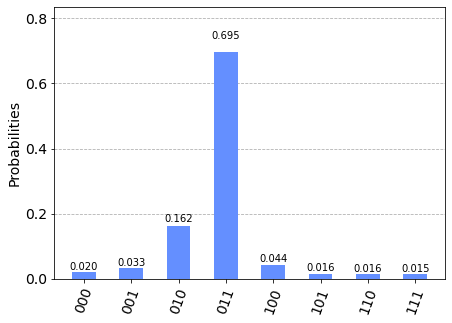

In [39]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
import qiskit
from qiskit import QuantumCircuit, execute, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile, assemble
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

# Most of this is from: https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html#2.-Example:-T-gate-

backend = BasicAer.get_backend('unitary_simulator')

def initialize_state(circuit, theta):
  circuit.x(3) 
  for qubit in range(3):
    circuit.h(qubit)

  for i in range(4):
    circuit.cu1(theta, 0, 3)

  for i in range(2):
    circuit.cu1(theta, 1, 3)

  circuit.cu1(theta, 2, 3)


def inverse_quantum_fourier_transform(circuit):
  circuit.h(0)

  circuit.cu1((-2*np.pi)/2**2, 0, 1)
  circuit.h(1)

  circuit.cu1((-2*np.pi)/2**3, 0, 2)
  circuit.cu1((-2*np.pi)/2**2, 1, 2)
  circuit.h(2)


def quantum_phase_estimation(theta):
  circuit = qiskit.QuantumCircuit(4,3)
  
  initialize_state(circuit, theta)

  circuit.barrier()

  inverse_quantum_fourier_transform(circuit)

  circuit.barrier()

  for i in range(3):
    circuit.measure(i,i)
  return circuit

# Run some tests
test_circuit = quantum_phase_estimation(2*np.pi*1/3)
print(test_circuit)

results1 = qiskit.execute(test_circuit, backend=qiskit.BasicAer.get_backend('qasm_simulator'),
                     shots=2048).result()
plot_histogram(results1.get_counts())

     ┌───┐                               ┌───┐                          »
q_0: ┤ H ├─■──────■──────■──────■────────┤ H ├─────────────■────────────»
     ├───┤ │      │      │      │        └───┘             │-pi/2  ┌───┐»
q_1: ┤ H ├─┼──────┼──────┼──────┼──────■──────────■────────■───────┤ H ├»
     ├───┤ │      │      │      │      │          │                └───┘»
q_2: ┤ H ├─┼──────┼──────┼──────┼──────┼──────────┼──────■──────────────»
     ├───┤ │pi/2  │pi/2  │pi/2  │pi/2  │pi/pi/2   │pi/2  │pi/pi/2       »
q_3: ┤ X ├─■──────■──────■──────■──────■──────────■──────■──────────────»
     └───┘                                                              »
c_0: ═══════════════════════════════════════════════════════════════════»
                                                                        »
c_1: ═══════════════════════════════════════════════════════════════════»
                                                                        »
c_2: ═════════════════════════════════

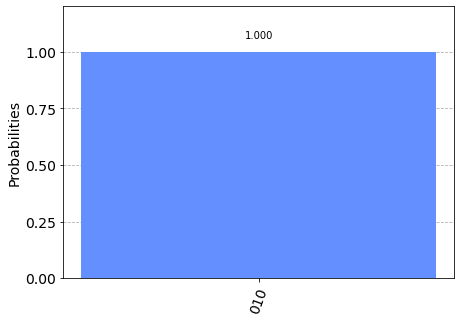

In [38]:
# More tests
test_circuit = quantum_phase_estimation(2*np.pi*1/4)
print(test_circuit)

results2 = qiskit.execute(test_circuit, backend=qiskit.BasicAer.get_backend('qasm_simulator'),
                     shots=2048).result()
plot_histogram(results2.get_counts())
